In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


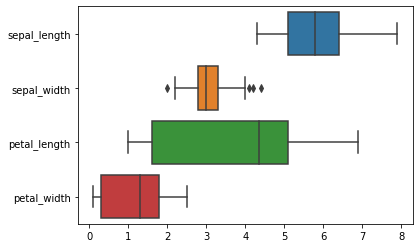

In [5]:
sns.boxplot(data = df, orient = "h")
plt.show()


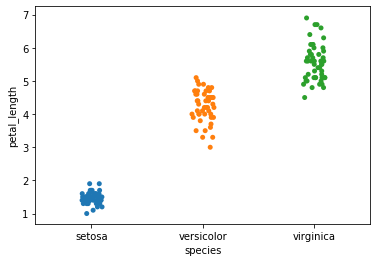

In [6]:
#stripplot()、swarmplot()等的圖。
sns.stripplot(x = "species", y = "petal_length", data = df)
plt.show()

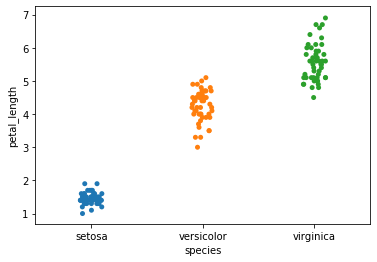

In [7]:
#stripplot()、swarmplot()等的圖。
sns.stripplot(x = "species", y = "petal_length", data = df,jitter=True)#jitter=True 加入抖動 避免重疊
plt.show()

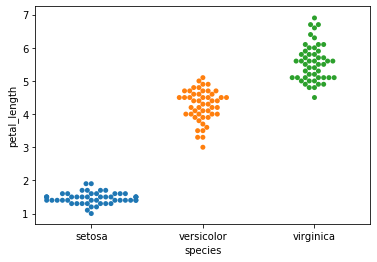

In [8]:
#使用swarmplot 從而避免重疊點 
sns.swarmplot(x='species',y='petal_length',data=df)

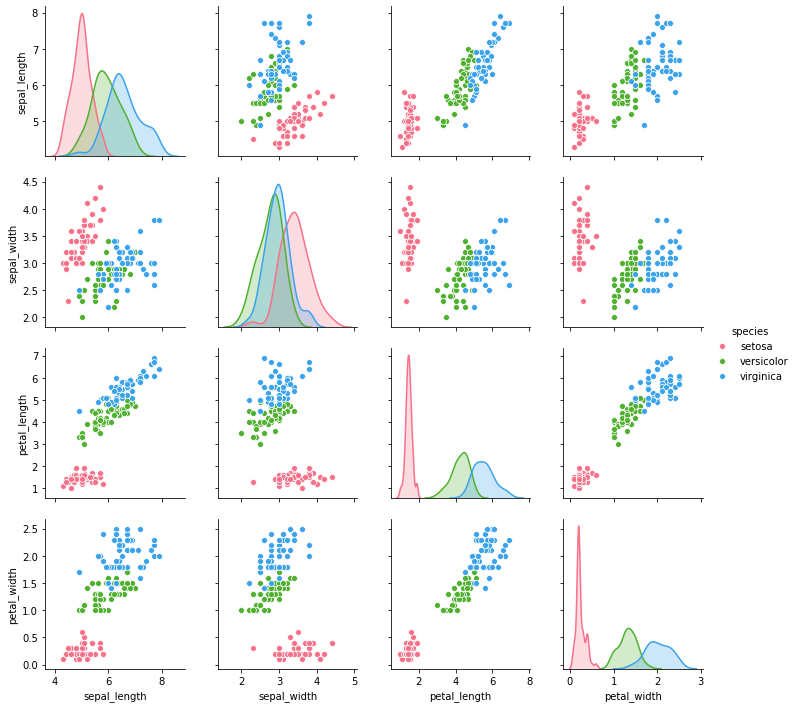

In [9]:
sns.pairplot(df,hue = 'species',diag_kind = "kde",kind = "scatter",palette = "husl")
plt.show()

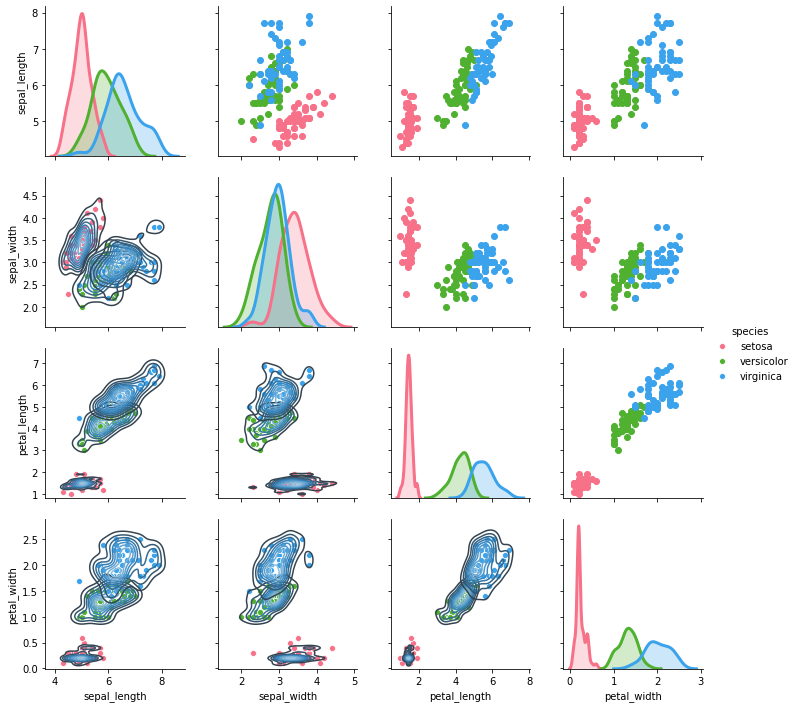

In [10]:
g = sns.pairplot(df,hue = 'species',diag_kind = "kde",kind = "scatter",palette = "husl")
#diag_kind = 'auto', 'hist', 'kde'
g.map_upper(plt.scatter)#上半三角形
g.map_lower(sns.kdeplot, cmap = "Blues_d")#下半三角形
g.map_diag(sns.kdeplot, lw = 3, legend = False);
plt.show()

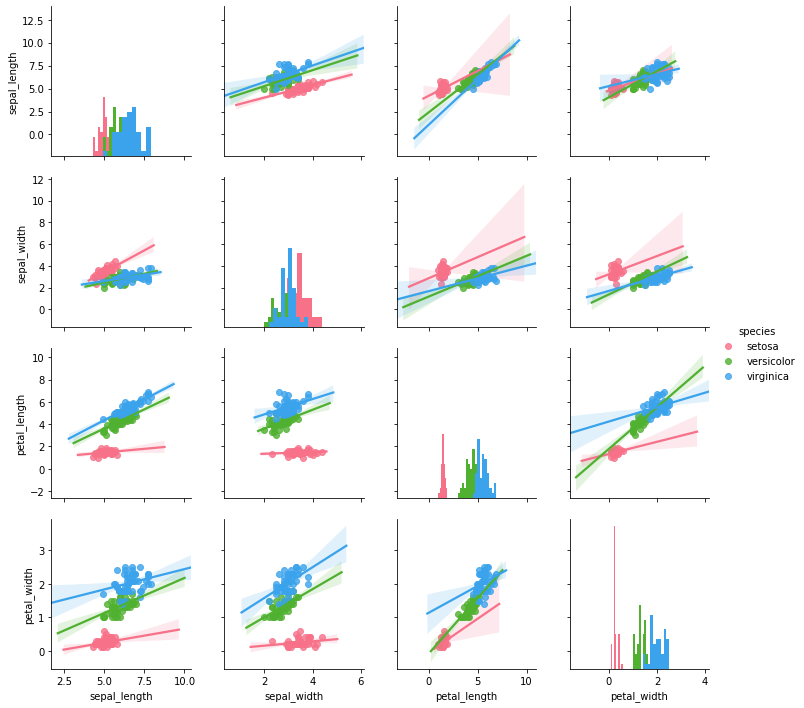

In [11]:
g = sns.pairplot(df,hue = 'species',diag_kind = "hist",kind = "reg",palette = "husl")#regression
#kind = {'scatter', 'reg'}
#diag_kind = {'auto', 'hist', 'kde'}